In [38]:
#importing numpy and pandas
#Reading the data from csv file
import numpy as np
import pandas as pd

In [39]:
# The code was removed by Watson Studio for sharing.

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711,Single,Male,30000,0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555,Married,Female,40000,0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,28907,Married,Male,160000,5,Partial College,Professional,No,3,2.0,Europe,55,No
3,2,Single,Male,160000,0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410,Single,Female,70000,2,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [40]:
data.describe()

,ID,Yearly Income,Children,Cars,Commute Distance,Age
count,6997.000000,6997.000000,6997.000000,6997.000000,6996.000000,6997.000000
mean,17746.030585,57030.155781,1.110619,1.586823,4.214551,45.107332
std,4339.171349,32068.231104,1.600296,1.146782,2.927598,11.916654
min,2.000000,10000.000000,0.000000,0.000000,1.000000,25.000000
25%,14250.000000,30000.000000,0.000000,1.000000,1.000000,36.000000
50%,17407.000000,60000.000000,0.000000,2.000000,4.000000,44.000000
75%,20614.000000,70000.000000,2.000000,2.000000,6.000000,53.000000
max,29476.000000,170000.000000,5.000000,4.000000,13.000000,96.000000


In [41]:
#target variable is Bike Buyer, a categorical variable
#Rest are features of dataset
data['Bike Buyer'].value_counts()

No     5997
Yes    1000
Name: Bike Buyer, dtype: int64

In [42]:
#examine missing values
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                  0
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    1
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [43]:
#data cleaning and missing value treatment

In [44]:
data['Commute Distance'].value_counts()

1.0     1755
2.0     1153
5.0      936
7.0      770
6.0      636
3.0      544
8.0      408
9.0      282
4.0      230
11.0     134
13.0      74
10.0      70
12.0       4
Name: Commute Distance, dtype: int64

In [45]:
data['Commute Distance'].fillna(1.0,inplace=True)
print(data)

         ID Marital Status  Gender  Yearly Income  Children  \
0     22711         Single    Male          30000         0   
1     13555        Married  Female          40000         0   
2     28907        Married    Male         160000         5   
3         2         Single    Male         160000         0   
4     25410         Single  Female          70000         2   
5         4        Married  Female         120000         2   
6     15756         Single  Female          70000         0   
7     11085         Single  Female          60000         0   
8     17974        Married  Female          30000         1   
9     21008         Single  Female          20000         1   
10    28985         Single    Male          50000         0   
11    11087        Married  Female          70000         2   
12    20434         Single    Male          60000         0   
13    14902        Married  Female          40000         0   
14    11091        Married    Male          90000      

In [46]:
data.apply(lambda x: sum(x.isnull()),axis=0)

ID                  0
Marital Status      0
Gender              0
Yearly Income       0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Bike Buyer          0
dtype: int64

In [47]:
#label encoding
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
data['Marital Status']=labelencoder_X.fit_transform(data['Marital Status'])
data['Gender']=labelencoder_X.fit_transform(data['Gender'])
data['Education']=labelencoder_X.fit_transform(data['Education'])
data['Occupation']=labelencoder_X.fit_transform(data['Occupation'])
data['Home Owner']=labelencoder_X.fit_transform(data['Home Owner'])
data['Region']=labelencoder_X.fit_transform(data['Region'])
data['Bike Buyer']=labelencoder_X.fit_transform(data['Bike Buyer'])

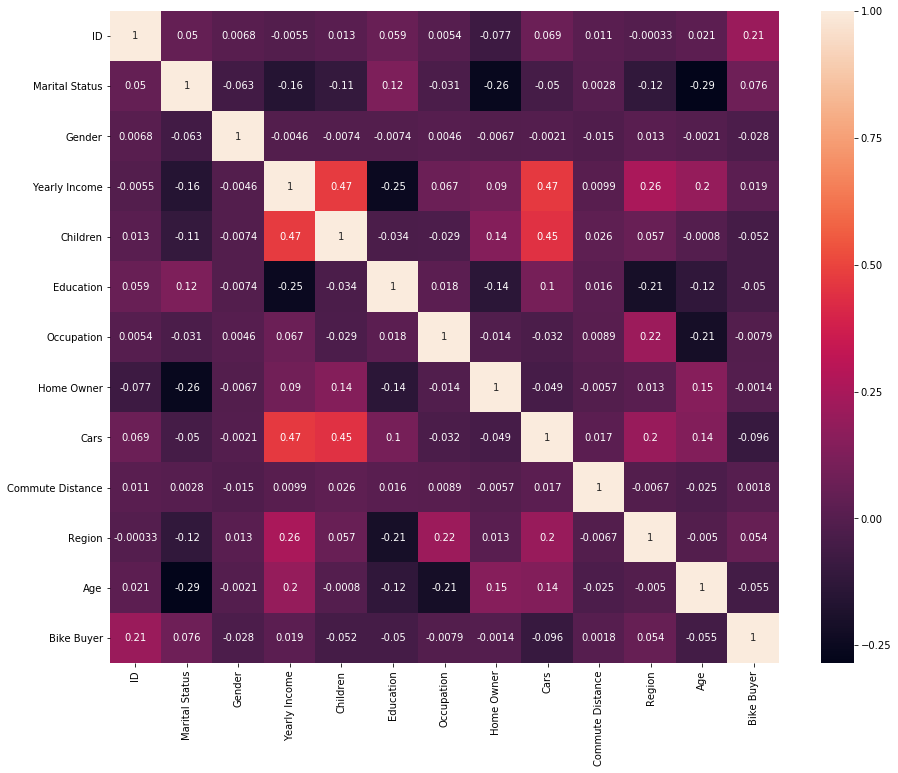

In [48]:
#to check correlations among columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

In [49]:
data.corr()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
ID,1.000000,0.049683,0.006793,-0.005485,0.012624,0.059291,0.005399,-0.077406,0.068729,0.011133,-0.000333,0.021429,0.210560
Marital Status,0.049683,1.000000,-0.063385,-0.159403,-0.109381,0.123413,-0.031459,-0.257585,-0.049947,0.002836,-0.115873,-0.285554,0.076291
Gender,0.006793,-0.063385,1.000000,-0.004564,-0.007350,-0.007370,0.004650,-0.006682,-0.002066,-0.015424,0.013057,-0.002123,-0.028298
Yearly Income,-0.005485,-0.159403,-0.004564,1.000000,0.474113,-0.249486,0.066631,0.090089,0.471993,0.009864,0.256048,0.195389,0.019227
Children,0.012624,-0.109381,-0.007350,0.474113,1.000000,-0.033522,-0.028983,0.141994,0.447605,0.026247,0.056611,-0.000803,-0.051962
Education,0.059291,0.123413,-0.007370,-0.249486,-0.033522,1.000000,0.018243,-0.138411,0.103111,0.015560,-0.210062,-0.123425,-0.049899
Occupation,0.005399,-0.031459,0.004650,0.066631,-0.028983,0.018243,1.000000,-0.013761,-0.032003,0.008899,0.215309,-0.212152,-0.007937
Home Owner,-0.077406,-0.257585,-0.006682,0.090089,0.141994,-0.138411,-0.013761,1.000000,-0.049189,-0.005708,0.013076,0.148014,-0.001434
Cars,0.068729,-0.049947,-0.002066,0.471993,0.447605,0.103111,-0.032003,-0.049189,1.000000,0.017198,0.202122,0.141093,-0.095730
Commute Distance,0.011133,0.002836,-0.015424,0.009864,0.026247,0.015560,0.008899,-0.005708,0.017198,1.000000,-0.006653,-0.025205,0.001801


In [50]:
# remove the columns which doesn't have any significant effect on the data set
data=data.drop(['ID'],axis=1)
data=data.drop(['Marital Status'],axis=1)
data=data.drop(['Region'],axis=1)
data=data.drop(['Commute Distance'],axis=1)       

In [51]:
data

,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Age,Bike Buyer
0,1,30000,0,3,0,0,1,33,1
1,0,40000,0,1,0,1,0,37,1
2,1,160000,5,3,3,0,3,55,0
3,1,160000,0,1,1,1,2,47,0
4,0,70000,2,0,4,0,1,38,1
5,0,120000,2,0,1,1,3,40,0
6,0,70000,0,2,3,1,2,49,1
7,0,60000,0,2,3,0,2,49,0
8,0,30000,1,0,0,1,0,38,1
9,0,20000,1,3,2,0,0,46,1


In [52]:
data.shape

(6997, 9)

In [53]:
X = data.iloc[:,:-1].values
y = data.iloc[:,8].values

In [54]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()
onehotencoder = OneHotEncoder(categorical_features=[4])
X = onehotencoder.fit_transform(X).toarray()

In [55]:
X=X[:,1:]

# Preprocessing

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X).transform(X)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.25      ,  0.11267606],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.16901408],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.75      ,  0.42253521],
       ..., 
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.5       ,  0.3943662 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.75      ,  0.4084507 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.75      ,  0.4084507 ]])

In [57]:
y

array([1, 1, 0, ..., 0, 0, 0])

# Classification models

KNN Classification

In [58]:
# KNN Classifier
import pandas
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = KNeighborsClassifier()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

84.6552830574


In [59]:
k_range=range(1,30)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=model_selection.cross_val_score(knn, X, y, cv=kfold)
    k_scores.append(scores.mean())
print (k_scores)

[0.78708645003065603, 0.85355916615573268, 0.83168383404864099, 0.85670386266094423, 0.84655283057428987, 0.86027794808910696, 0.85270222767218473, 0.85899570815450643, 0.85856631923155535, 0.86085407725321894, 0.85913876967095848, 0.86028305742898026, 0.85813999591252821, 0.85985509912119351, 0.85785407725321894, 0.86028367054976496, 0.85871122011036183, 0.85999816063764545, 0.85785428162681376, 0.86042591457183715, 0.85685346413243413, 0.8597122419783364, 0.85742530145105245, 0.85914060903331291, 0.85785407725321894, 0.85842652769262207, 0.85728326180257519, 0.85785530349478845, 0.85671183323114664]


Text(0,0.5,'Cross-Validated Accuracy')

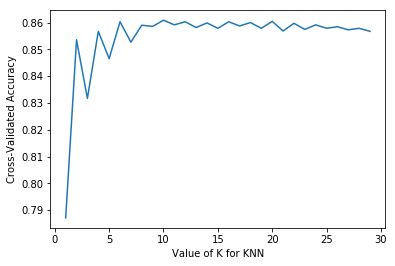

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [61]:
#we have the maximum accuracy for Kneighbors at k=6
model = KNeighborsClassifier(n_neighbors=6)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

86.0277948089


In [62]:
model.fit(X,y)
y_pred=model.predict(X[[6]])
y_pred

array([1])

Decision Tree Classification

In [63]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = DecisionTreeClassifier()
model.fit(X,y)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

83.9404046597


In [64]:
model.fit(X,y)
y_pred=model.predict(X[[29]])
y_pred

array([1])

Logistic Regression Classification

In [65]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

85.7142857143


Random Forest Classification

In [66]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

84.1547108114


Support Vector Classification

In [67]:
# Support Vector Classifier
from sklearn.svm import SVC
seed = 8
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = SVC(C=2)
model.fit(X,y)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean()*100)

86.3564479869


In [76]:
!pip install watson-machine-learning-client

    100% |################################| 942kB 2.6MB/s eta 0:00:01
    100% |################################| 10.0MB 1.1MB/s eta 0:00:01
    100% |################################| 51kB 1.8MB/s eta 0:00:01
    100% |################################| 51kB 2.0MB/s eta 0:00:01
    100% |################################| 61kB 2.6MB/s eta 0:00:01
    100% |################################| 153kB 3.5MB/s eta 0:00:01
    100% |################################| 163kB 3.8MB/s eta 0:00:01
    100% |################################| 51kB 2.2MB/s eta 0:00:01
    100% |################################| 235kB 4.5MB/s eta 0:00:01
    100% |################################| 17.2MB 905kB/s eta 0:00:01
    100% |################################| 512kB 3.9MB/s eta 0:00:01
    100% |################################| 61kB 2.6MB/s eta 0:00:01
    100% |################################| 143kB 3.6MB/s eta 0:00:01
    100% |################################| 1.1MB 3.7MB/s eta 0:00:01
    100% |#############

In [77]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [78]:
# The code was removed by Watson Studio for sharing.

In [79]:
client= WatsonMachineLearningAPIClient(wml_credentials)

In [80]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Harika",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"harikavattam@gmail.com",
             client.repository.ModelMetaNames.NAME:"Bike Buyer Prediction"}

In [83]:
model_artifact=client.repository.store_model(model,meta_props=model_props)

In [84]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [85]:
published_model_uid

'7a7102c1-08b8-4796-8058-d7e6fcf01942'

In [86]:
deployment=client.deployments.create(published_model_uid,name="Bike Buyer Prediction")



#######################################################################################

Synchronous deployment creation for uid: '7a7102c1-08b8-4796-8058-d7e6fcf01942' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='279b2dfb-e34a-4866-9534-ea835455104e'
------------------------------------------------------------------------------------------------




In [87]:
scoring_endpoint=client.deployments.get_scoring_url(deployment)

In [88]:
scoring_endpoint


'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/f99eeda0-1e86-4f49-9c9c-2dc77d6e8f3b/deployments/279b2dfb-e34a-4866-9534-ea835455104e/online'